In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Problem description

This notebook has been created to perform a clustering analysis of US counties, using socio-economic data. Purpose of this exploratory analysis was to identify groups of counties that have similar socio-economic characteristics.

The dataset used is the US Census Demographic Data and comes from Kaggle (https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data/data).

No particular challenges with the data.

## Loading data + EDA

In [2]:
census_df = pd.read_csv('census_data/acs2017_county_data.csv')
census_df.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [3]:
census_df.shape

(3220, 37)

In [4]:
census_df.info

<bound method DataFrame.info of       CountyId        State               County  TotalPop    Men   Women  \
0         1001      Alabama       Autauga County     55036  26899   28137   
1         1003      Alabama       Baldwin County    203360  99527  103833   
2         1005      Alabama       Barbour County     26201  13976   12225   
3         1007      Alabama          Bibb County     22580  12251   10329   
4         1009      Alabama        Blount County     57667  28490   29177   
...        ...          ...                  ...       ...    ...     ...   
3215     72145  Puerto Rico  Vega Baja Municipio     54754  26269   28485   
3216     72147  Puerto Rico    Vieques Municipio      8931   4351    4580   
3217     72149  Puerto Rico   Villalba Municipio     23659  11510   12149   
3218     72151  Puerto Rico    Yabucoa Municipio     35025  16984   18041   
3219     72153  Puerto Rico      Yauco Municipio     37585  18052   19533   

      Hispanic  White  Black  Native  ...  

In [5]:
census_df.dtypes

CountyId              int64
State                object
County               object
TotalPop              int64
Men                   int64
Women                 int64
Hispanic            float64
White               float64
Black               float64
Native              float64
Asian               float64
Pacific             float64
VotingAgeCitizen      int64
Income                int64
IncomeErr             int64
IncomePerCap          int64
IncomePerCapErr       int64
Poverty             float64
ChildPoverty        float64
Professional        float64
Service             float64
Office              float64
Construction        float64
Production          float64
Drive               float64
Carpool             float64
Transit             float64
Walk                float64
OtherTransp         float64
WorkAtHome          float64
MeanCommute         float64
Employed              int64
PrivateWork         float64
PublicWork          float64
SelfEmployed        float64
FamilyWork          

In [6]:
census_df.describe()

,CountyId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,1.007681e+05,4.958781e+04,5.118032e+04,11.296584,74.920186,8.681957,1.768416,1.289379,0.083416,...,3.244472,1.598696,4.736894,23.474534,4.709295e+04,74.863323,17.086118,7.772733,0.278820,6.665590
std,16292.078954,3.244996e+05,1.593212e+05,1.652164e+05,19.342522,23.056700,14.333571,7.422946,2.716191,0.709277,...,3.891510,1.678232,3.073484,5.687241,1.558159e+05,7.647916,6.390868,3.855454,0.448073,3.772612
min,1001.000000,7.400000e+01,3.900000e+01,3.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.100000,3.900000e+01,31.100000,4.400000,0.000000,0.000000,0.000000
25%,19032.500000,1.121350e+04,5.645500e+03,5.553500e+03,2.100000,63.500000,0.600000,0.100000,0.200000,0.000000,...,1.400000,0.800000,2.900000,19.600000,4.573000e+03,71.200000,12.700000,5.200000,0.100000,4.475000
50%,30024.000000,2.584750e+04,1.287900e+04,1.299350e+04,4.100000,83.600000,2.000000,0.300000,0.600000,0.000000,...,2.300000,1.300000,4.100000,23.200000,1.061150e+04,76.100000,15.900000,6.800000,0.200000,6.100000
75%,46105.500000,6.660825e+04,3.301725e+04,3.359375e+04,10.000000,92.800000,9.500000,0.600000,1.200000,0.100000,...,3.825000,1.900000,5.800000,27.000000,2.874725e+04,80.200000,19.900000,9.200000,0.300000,8.000000
max,72153.000000,1.010572e+07,4.979641e+06,5.126081e+06,100.000000,100.000000,86.900000,90.300000,41.800000,33.700000,...,59.200000,43.200000,33.000000,45.100000,4.805817e+06,88.800000,64.800000,38.000000,8.000000,40.900000


In [7]:
census_df.isna().sum()

CountyId            0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        1
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

## Correlation analysis

In [8]:
corr_matrix = census_df.drop(columns=["State","County","CountyId"]).corr()

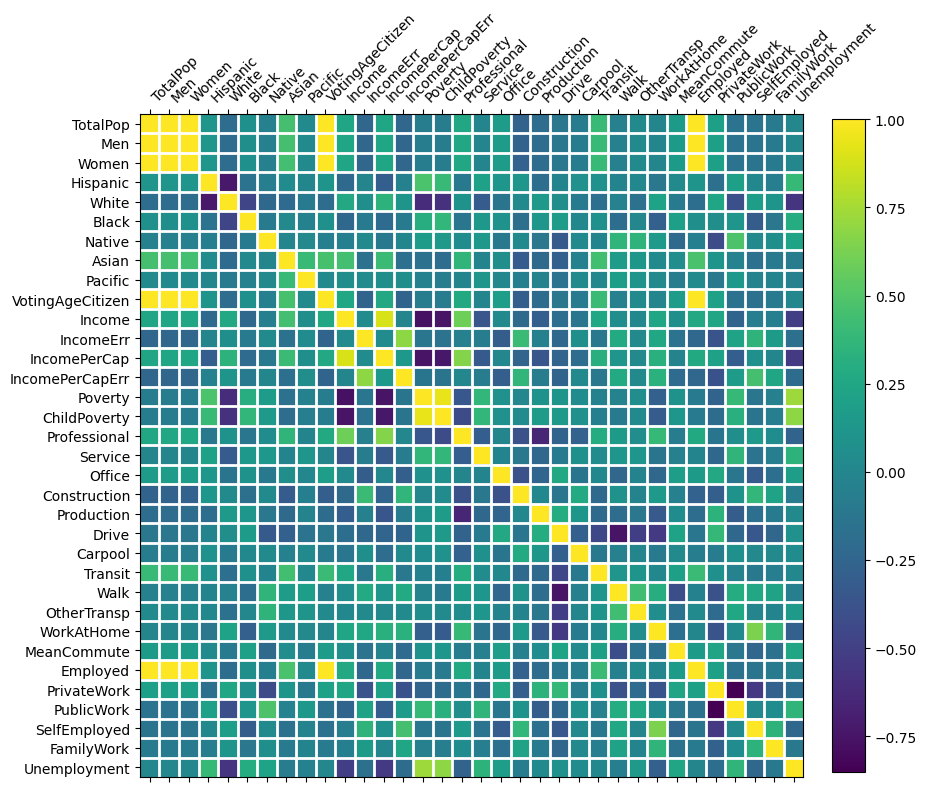

In [9]:
from matplotlib.colors import Normalize

fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(corr_matrix)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.xticks(ha='left')

for i in range(len(corr_matrix.columns) - 1):
    ax.axhline(y=i + 0.5, color='white', linestyle='-', linewidth=2)  # Horizontal lines
    ax.axvline(x=i + 0.5, color='white', linestyle='-', linewidth=2)  # Vertical lines

cbar = fig.colorbar(cax, ax=ax, fraction=0.045, pad=0.04)

plt.subplots_adjust(bottom=0.2, right=0.85)

plt.show()

## PCA Analysis

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

model_df = census_df.dropna().copy()
scaler = StandardScaler()
features_scaled = scaler.fit_transform(model_df.drop(columns=["State","County","CountyId"]))

In [12]:
# Define the maximum number of components
max_components = min(len(model_df.columns), 20)  # Limit to 20 for larger datasets

# Run PCA for 1 up to max_components
explained_variances = []
for n in range(1, max_components + 1):
    pca = PCA(n_components=n)
    pca.fit(features_scaled)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

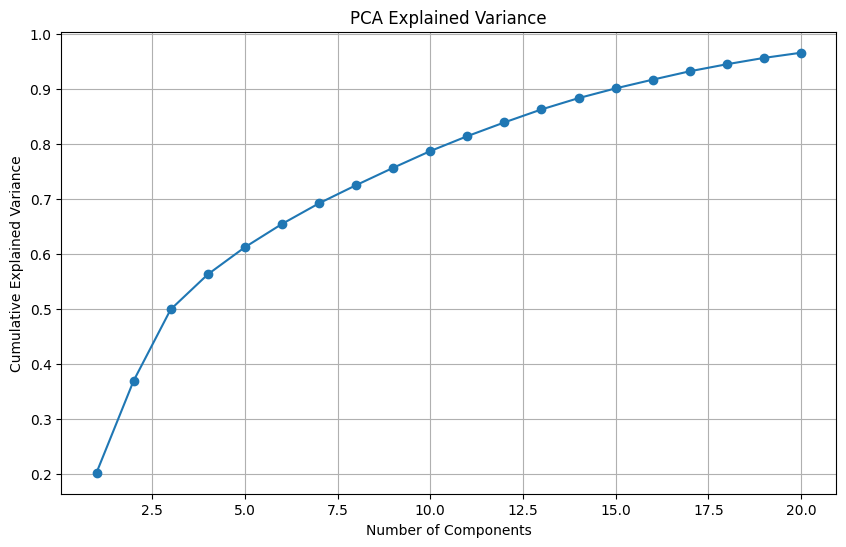

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

In [14]:
## We want to preserve some variance so we will settle for 7 principal components
pca = PCA(n_components=7)
pca_features = pca.fit_transform(features_scaled)

## Clustering analysis

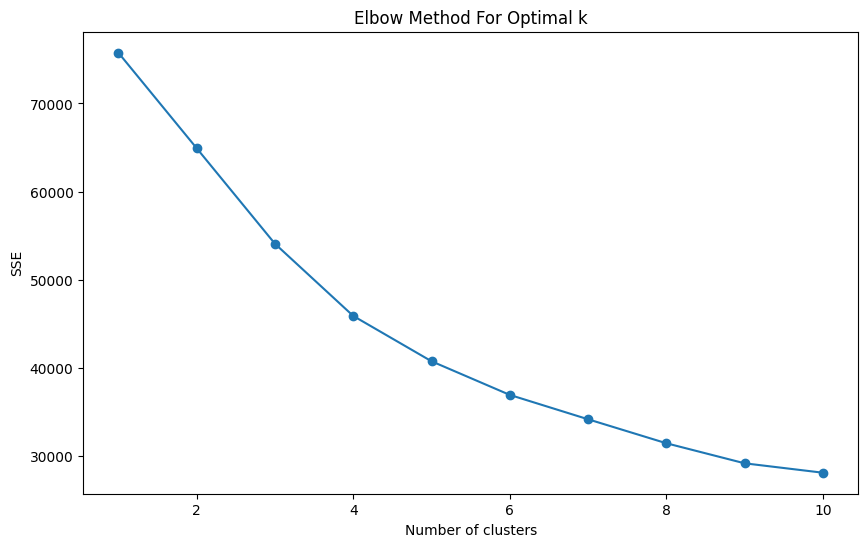

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determining the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [17]:
# We choose 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
model_df['Cluster'] = kmeans.fit_predict(pca_features)

In [18]:
clustered_counties = model_df.groupby('Cluster')['County'].unique()

In [19]:
print(clustered_counties)

Cluster
0    [Aleutians East Borough, Aleutians West Census...
1    [Barbour County, Bullock County, Butler County...
2    [Maricopa County, Pima County, Alameda County,...
3    [Autauga County, Baldwin County, Bibb County, ...
Name: County, dtype: object


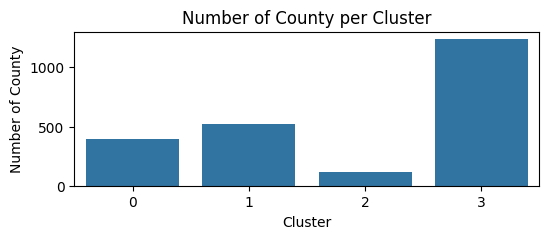

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of unique states per cluster
state_counts = model_df.groupby('Cluster')['County'].nunique()

# Bar plot of the number of states in each cluster
plt.figure(figsize=(6, 2))
sns.barplot(x=state_counts.index, y=state_counts.values,)
plt.title('Number of County per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of County')
plt.show()

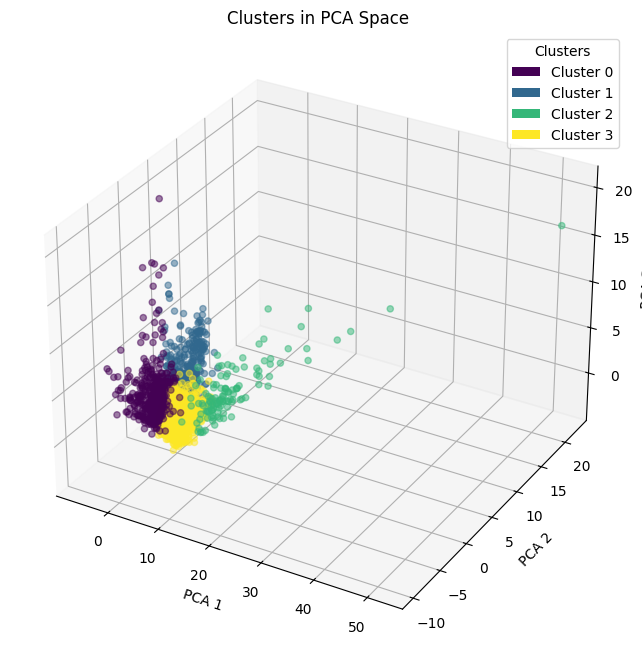

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch  # For creating legend patches

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assuming 'clusters' is a numpy array containing your cluster labels
unique_clusters = np.unique(model_df['Cluster'])
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))  # Create a color for each cluster

# Scatter plot each cluster to be able to create a legend
for cluster, color in zip(unique_clusters, colors):
    ix = model_df['Cluster'] == cluster
    ax.scatter(pca_features[ix, 0], pca_features[ix, 1], pca_features[ix, 2], c=[color], label=f'Cluster {cluster}', alpha=0.5)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('Clusters in PCA Space')

# Create a legend
legend_elements = [Patch(facecolor=color, label=f'Cluster {cluster}') for cluster, color in zip(unique_clusters, colors)]
ax.legend(handles=legend_elements, title="Clusters")

plt.show()

In [22]:
from sklearn.metrics import silhouette_score
score = silhouette_score(pca_features, model_df['Cluster'])
print("Silhouette Score: ", score)

Silhouette Score:  0.2734715587122609


In [67]:
centroids = kmeans.cluster_centers_
original_space_centroids = pca.inverse_transform(centroids)

In [76]:
centroids_df = pd.DataFrame(original_space_centroids, columns=model_df.drop(columns=["State","County","CountyId","Cluster"]).columns)

In [89]:
from math import pi
from sklearn.preprocessing import MinMaxScaler

# Define the columns to include in the radar chart
columns_to_include = [
'VotingAgeCitizen','Income','Poverty','Professional', 'Service', 'Office', 'Construction',
       'Production','Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'
]

# Filter out the relevant columns from original_space_centroids
# Assuming original_space_centroids has appropriate column names that match with `columns_to_include`
filtered_centroids = original_space_centroids[:, model_df.drop(columns=["State","County","CountyId","Cluster"]).columns.isin(columns_to_include)]

# Normalize the centroid data for better visualization
scaler = MinMaxScaler()
normalized_centroids = scaler.fit_transform(filtered_centroids)
centroids_df = pd.DataFrame(normalized_centroids, columns=columns_to_include)

# Number of variables we're plotting.
num_vars = len(centroids_df.columns)
angles = np.linspace(0, 2 * pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

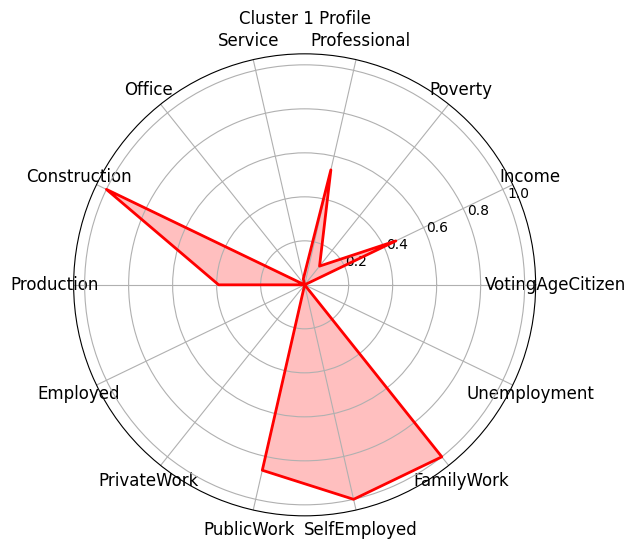

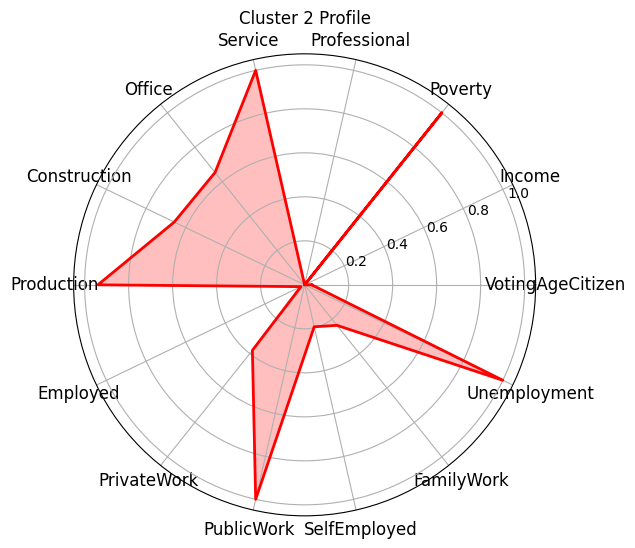

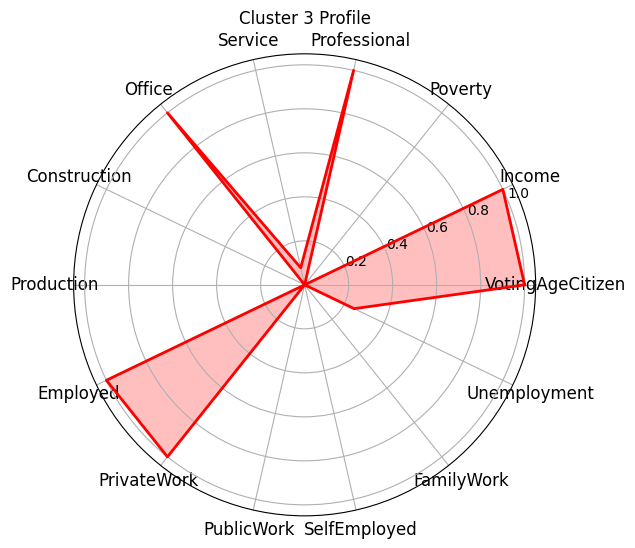

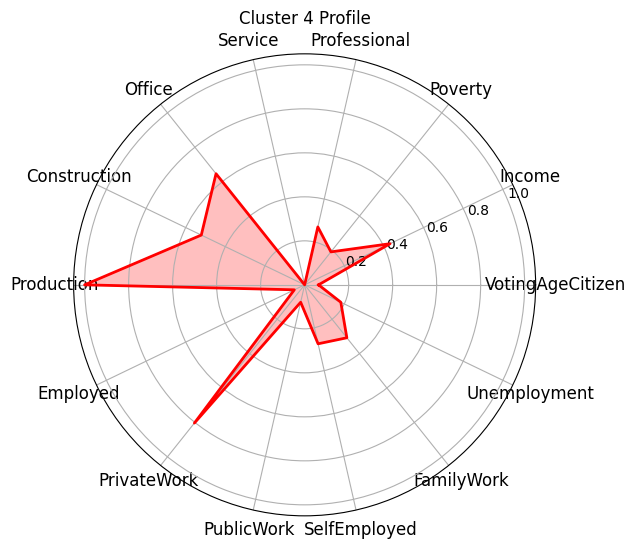

In [91]:
fig_size = 6  # Adjust the size of each radar chart
num_clusters = len(centroids_df)

# Create a figure for each cluster
for i in range(num_clusters):
    fig, ax = plt.subplots(figsize=(fig_size, fig_size), subplot_kw=dict(polar=True))
    values = centroids_df.iloc[i].tolist()
    values += values[:1]

    ax.fill(angles, values, color='red', alpha=0.25)
    ax.plot(angles, values, color='red', linewidth=2)  # Plot the outline
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(centroids_df.columns, fontsize=12, rotation=45)

    # Set the title for each chart
    plt.title(f'Cluster {i+1} Profile', position=(0.5, 1.1), ha='center')

    plt.show()

In [97]:
import random

random.sample(sorted(clustered_counties[0]), 10)

['Chase County',
 'Mendocino County',
 'Wallowa County',
 'Haakon County',
 'Stevens County',
 'Petersburg Borough',
 'Rio Blanco County',
 'Cedar County',
 'Clarke County',
 'Traverse County']

In [98]:
random.sample(sorted(clustered_counties[1]), 10)

['Hendry County',
 'Atkinson County',
 'Covington County',
 'Estill County',
 'Tallahatchie County',
 'Talbot County',
 'Wyandotte County',
 'Maunabo Municipio',
 'Petersburg city',
 'Tehama County']

In [99]:
random.sample(sorted(clustered_counties[2]), 10)

['Will County',
 'Camden County',
 'Fairfax County',
 'Los Angeles County',
 'Denver County',
 'Orange County',
 'Bucks County',
 'Norfolk County',
 'Fresno County',
 'Worcester County']

In [100]:
random.sample(sorted(clustered_counties[3]), 10)

['Atascosa County',
 'Fauquier County',
 'Placer County',
 'Cortland County',
 'St. Tammany Parish',
 'Christian County',
 'Grafton County',
 'Wharton County',
 'Essex County',
 'Accomack County']

In [96]:
state_cluster_ct = pd.crosstab(model_df['State'], model_df['Cluster'])

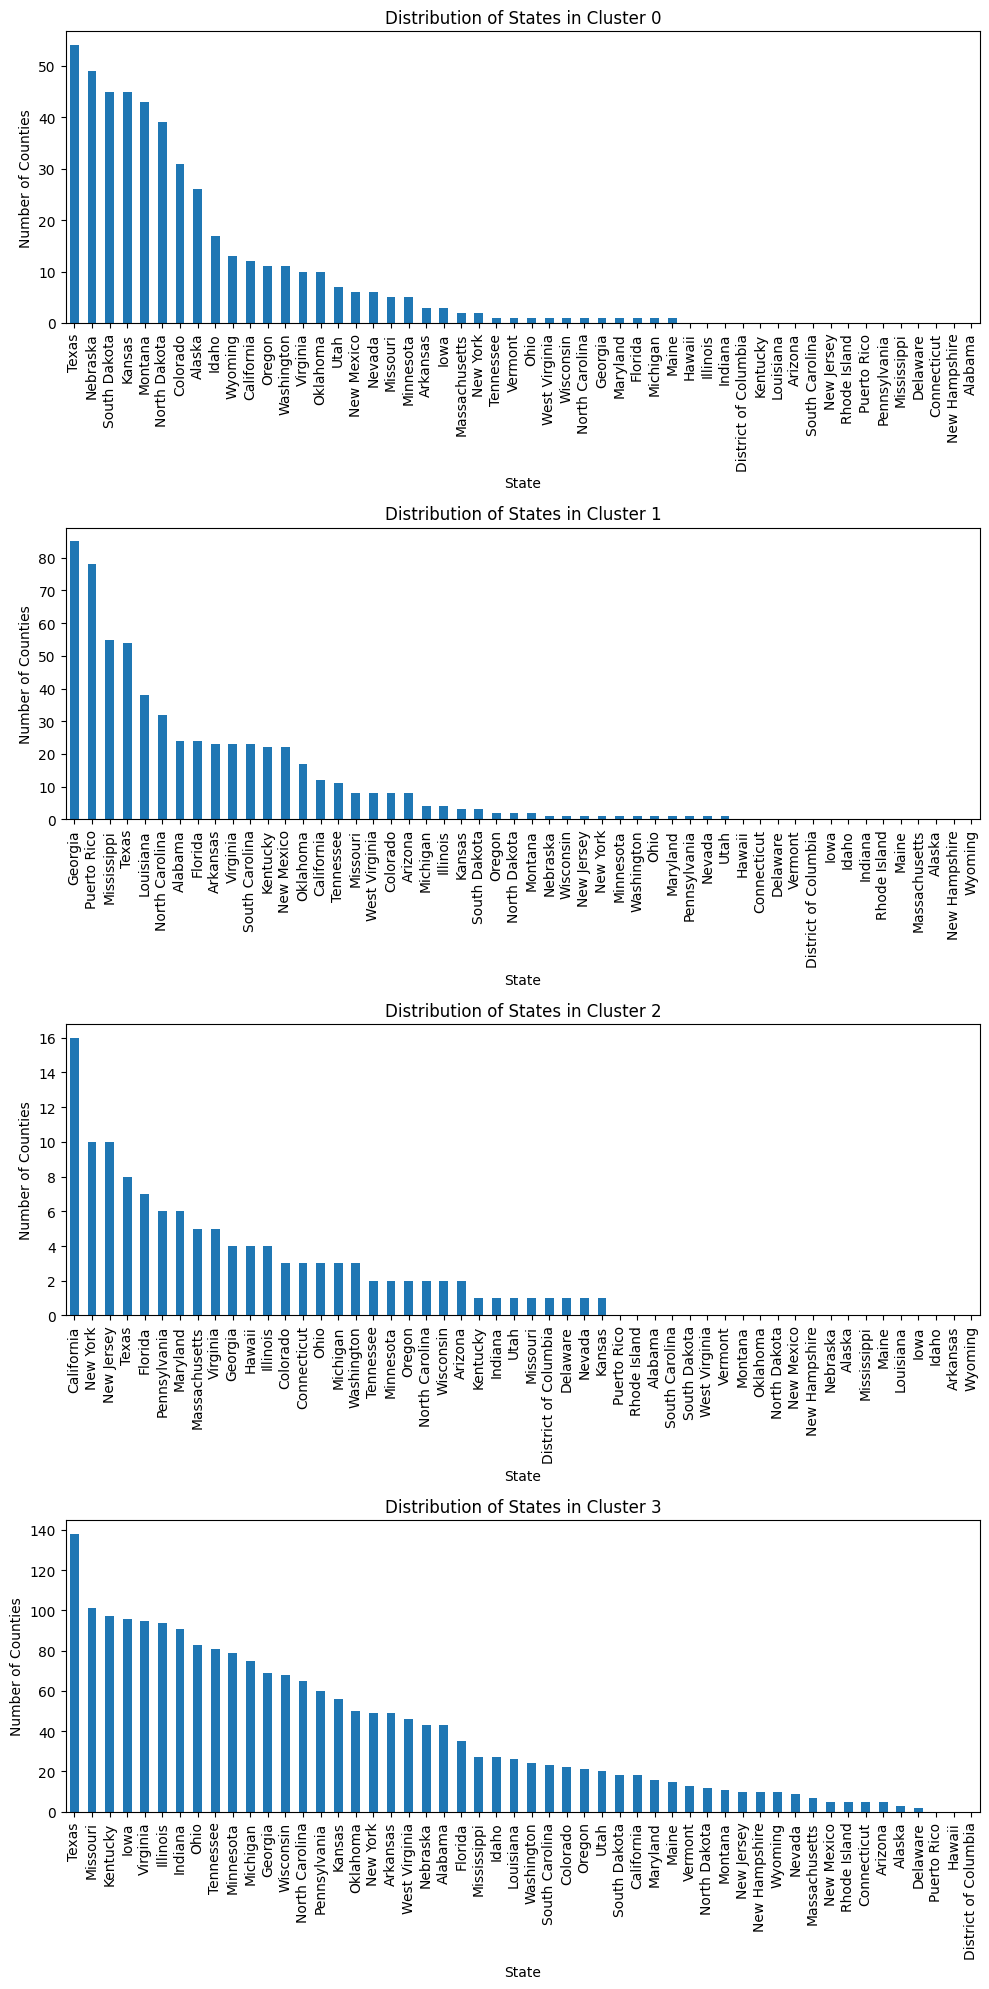

In [32]:
num_clusters = state_cluster_ct.shape[1]

fig, axes = plt.subplots(num_clusters, 1, figsize=(10, 5 * num_clusters))

for i in range(num_clusters):
    state_cluster_ct[i].sort_values(ascending=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of States in Cluster {i}')
    axes[i].set_ylabel('Number of Counties')
    axes[i].set_xlabel('State')

plt.tight_layout()
plt.show()

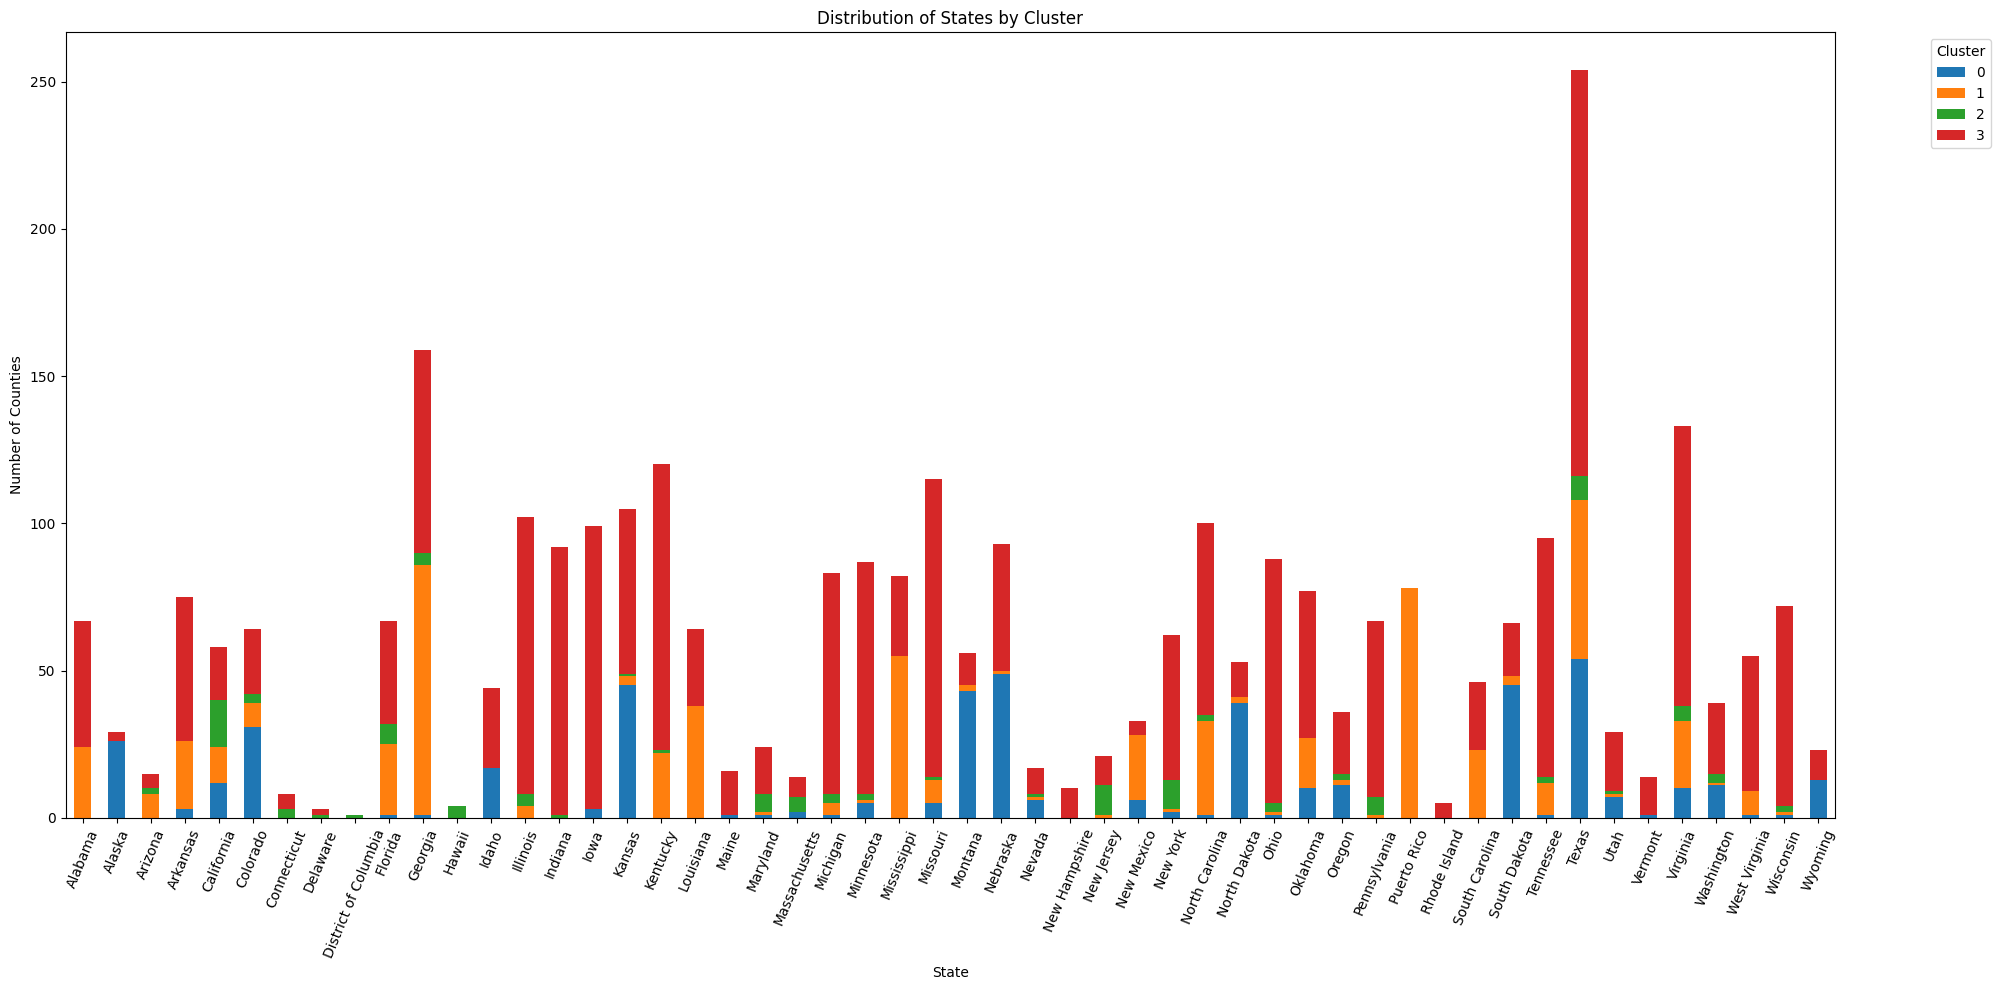

In [80]:
state_cluster_ct.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Distribution of States by Cluster')
plt.ylabel('Number of Counties')
plt.xlabel('State')
plt.xticks(rotation=67.5)  # Rotate labels 90 degrees for better visibility
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [81]:
model_df.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'Cluster'],
      dtype='object')

## Conclusion

After reducing our dataset to 7 principal components we have been able to cluster US counties into 4 group.

Each group have specific characteristic such as :
- High proportion of construction woker abd self employed for Cluster 1
- High proportion of unemployment and high poverty for Cluster 2
- High proportion of office worker and high income for Cluster 3
- High proportion of production worker and medium income for Cluster 4

Our clustering silouhette score is not very high but is above the 0.25 threshold. Possible improvment by increasing the number of principal components and/or by trying other clustering techniques